In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep = ',', index_col = 0)

R2:  0.19597515493830642
RMSE: 0.04756730059492431


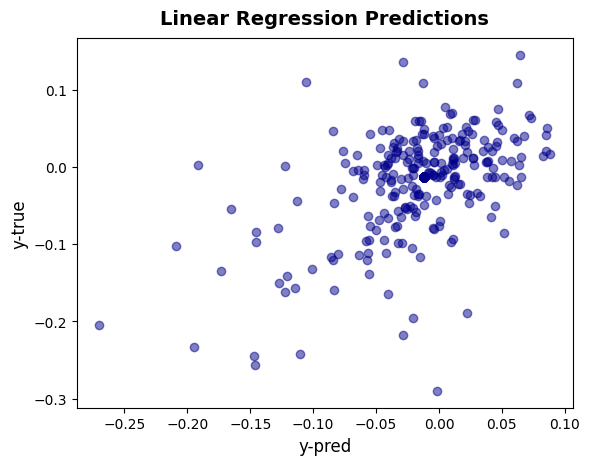

In [3]:
random.seed(38)

target_column = random.choice(ExN.columns)  # Randomly pick a column name

X = ExN.drop(columns=[target_column])  # Features (all columns except the target)
y = ExN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9050820743196156


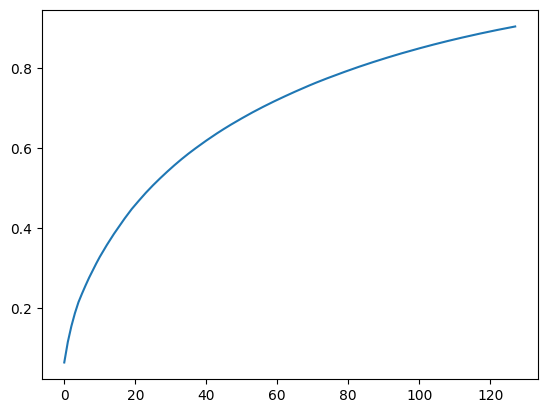

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 128
ExN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExN_PCA

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.145413,-0.176494,0.058918,-0.052340,-0.050963,0.022990,0.050296,0.151865,-0.005953,0.089468,...,-0.075101,-0.010666,-0.075644,-0.017954,-0.041521,-0.024971,-0.101139,0.003161,0.006140,0.047944
1,0.121665,-0.154405,-0.329633,0.085446,-0.027764,0.171829,-0.082921,-0.117315,0.102666,0.021965,...,0.145621,-0.089017,0.044044,-0.071785,0.049388,0.035646,-0.002988,0.018436,0.135918,-0.010298
2,-0.340401,0.047919,-0.166555,0.051694,0.003131,0.115349,0.136123,0.090463,-0.079675,-0.127785,...,0.082089,0.061564,0.028824,-0.035609,-0.036721,-0.117258,0.017288,0.036635,0.043435,-0.017990
3,0.014707,-0.003231,-0.000760,-0.000171,-0.001692,0.005334,-0.009251,0.005430,0.002858,0.000350,...,-0.000294,0.000810,0.004336,0.001198,-0.000454,0.001833,0.001220,-0.000882,0.001782,-0.000108
4,0.275645,0.067720,0.006158,0.056396,0.218533,0.054763,0.059303,-0.053247,-0.025801,-0.026441,...,-0.032314,-0.009433,-0.076281,-0.028829,-0.023336,0.061651,0.016562,0.047598,0.038755,0.000736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.126753,-0.205472,0.052706,-0.087183,0.084248,-0.012229,-0.034511,0.031257,0.149220,0.139814,...,0.018314,0.034819,-0.008141,-0.009070,0.060297,-0.075626,-0.045024,-0.025216,-0.028136,-0.005909
2059,0.065290,-0.143536,-0.109809,0.005045,-0.030866,0.062430,-0.061286,0.008156,0.172467,0.088203,...,-0.034822,-0.004338,-0.005189,0.006967,-0.023090,-0.034096,0.074737,-0.044159,0.004954,-0.031918
2060,0.014707,-0.003231,-0.000760,-0.000171,-0.001692,0.005334,-0.009251,0.005430,0.002858,0.000350,...,-0.000294,0.000810,0.004336,0.001198,-0.000454,0.001833,0.001220,-0.000882,0.001782,-0.000108
2061,-0.208502,-0.151558,0.189863,-0.224747,0.156850,0.151274,0.096142,0.040736,0.034164,0.184291,...,0.000176,-0.018293,0.009816,-0.021029,0.057784,-0.002721,0.114897,-0.022167,-0.034066,-0.037470


R2:  0.11350786562429716
RMSE: 0.04994720781939488


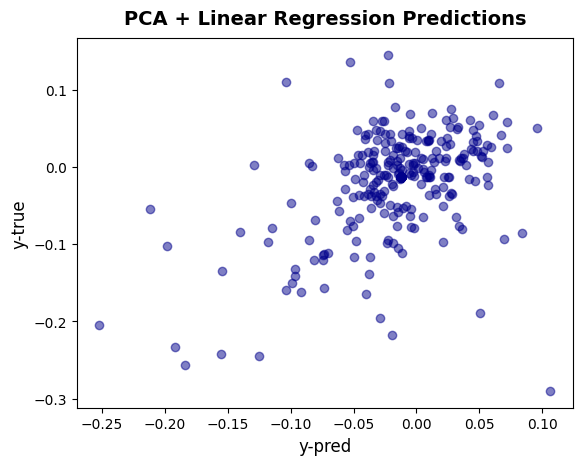

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ExN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

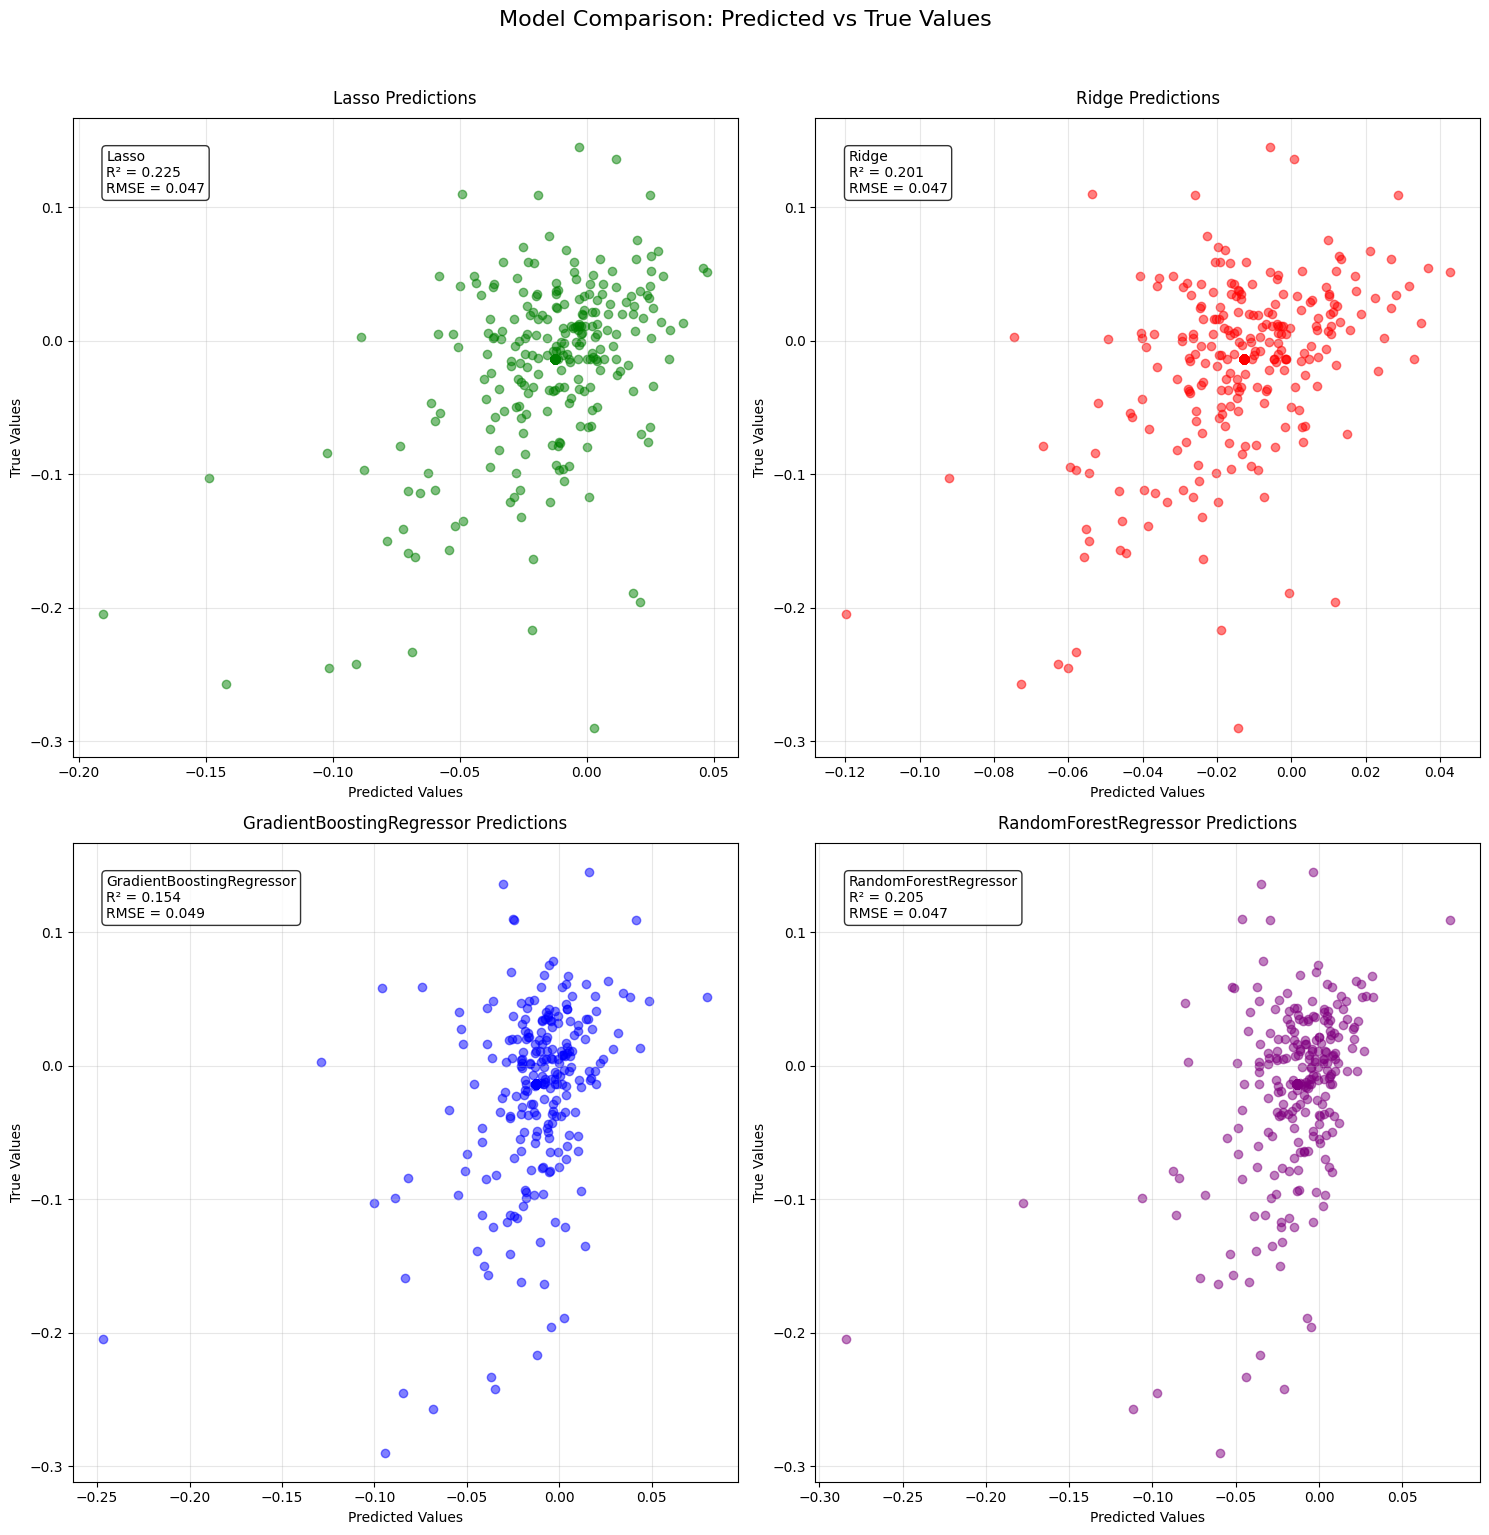

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0982e-04 - mse: 8.0982e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7068e-04 - mse: 3.7068e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5823e-04 - mse: 2.5823e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4099e-04 - mse: 1.4099e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1505e-04 - mse: 1.1505e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0048e-04 - mse: 1.0048e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 9/50
42/42 ━━━━━━━

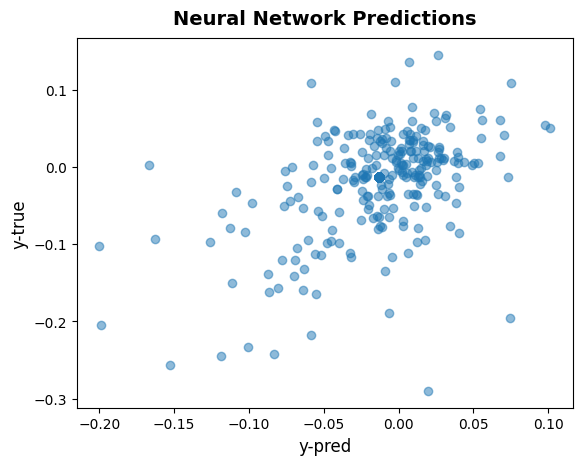

In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()